In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

from relative_path import PATH_DATA, PATH_OUTPUT_DATA, PATH_OUTPUT_GRAPH, PATH_OUTPUT_PROF

from pandas import DataFrame, Series

In [2]:
import missingno as msno

## Standard

In [3]:
TRACK_DATA = PATH_DATA / "tracks.parquet"
ARTISTS_DATA = PATH_DATA / "artists.parquet"

In [4]:
df_tracks = pd.read_parquet(TRACK_DATA)
df_artists = pd.read_parquet(ARTISTS_DATA)

In [143]:
from pandas import DataFrame, Series

class VisualizeMissing:
    def __init__(self, input_df:DataFrame, name:str, export:bool=False, export_path:Path=Path(r"/output")) -> None:
        self.df:DataFrame = input_df
        self.name = name.title()
        
        self._export = export
        self._export_path = export_path
        
        self._fontsize = 16
        self._color = "orange"
        
        self._label_rotation:int = 90
        self._figsize:int = (30,15)
        
        self._about:str = "Visualize Missing, NA, 0 values"
        
    def __post_init__(self):
        """ Post process the dataframe. """
        self.df.replace("", np.NaN, inplace=True)
        self.df.replace(0,  np.NaN, inplace=True)
    
    def Bar(self):
        fig = msno.bar(
            df = self.df, 
            fontsize = self._fontsize,
            label_rotation = self._label_rotation,
            figsize = self._figsize
        )
        
        chart_name = f"{self.name} Bar - {self._about}"
        fig_name = f"{self.name}Data_Bar_Missing.png"
        fig.set(title=chart_name)
        if self._export:
            plt.savefig(fig_name)
        return plt.show()
    
    def Matrix(self):
        fig = msno.matrix(
            df = self.df, 
            fontsize = self._fontsize,
            label_rotation = self._label_rotation,
            figsize = self._figsize
        )
        
        chart_name = f"{self.name} Matrix - {self._about}"
        fig_name = f"{self.name}Data_Matrix_Missing.png"
        fig.set(title=chart_name)
        if self._export:
            plt.savefig(fig_name)
        return plt.show()
    
    def Heatmap(self):
        fig = msno.heatmap(
            df = self.df, 
            fontsize = self._fontsize,
            label_rotation = self._label_rotation,
            figsize = self._figsize
        )
        
        chart_name = f"{self.name} Heatmap - {self._about}"
        fig_name = f"{self.name}Data_Heatmap_Missing.png"
        fig.set(title=chart_name)
        if self._export:
            plt.savefig(fig_name)
        return plt.show()

In [148]:
vis_tracks = VisualizeMissing(df_artists, "Artists", export=True)

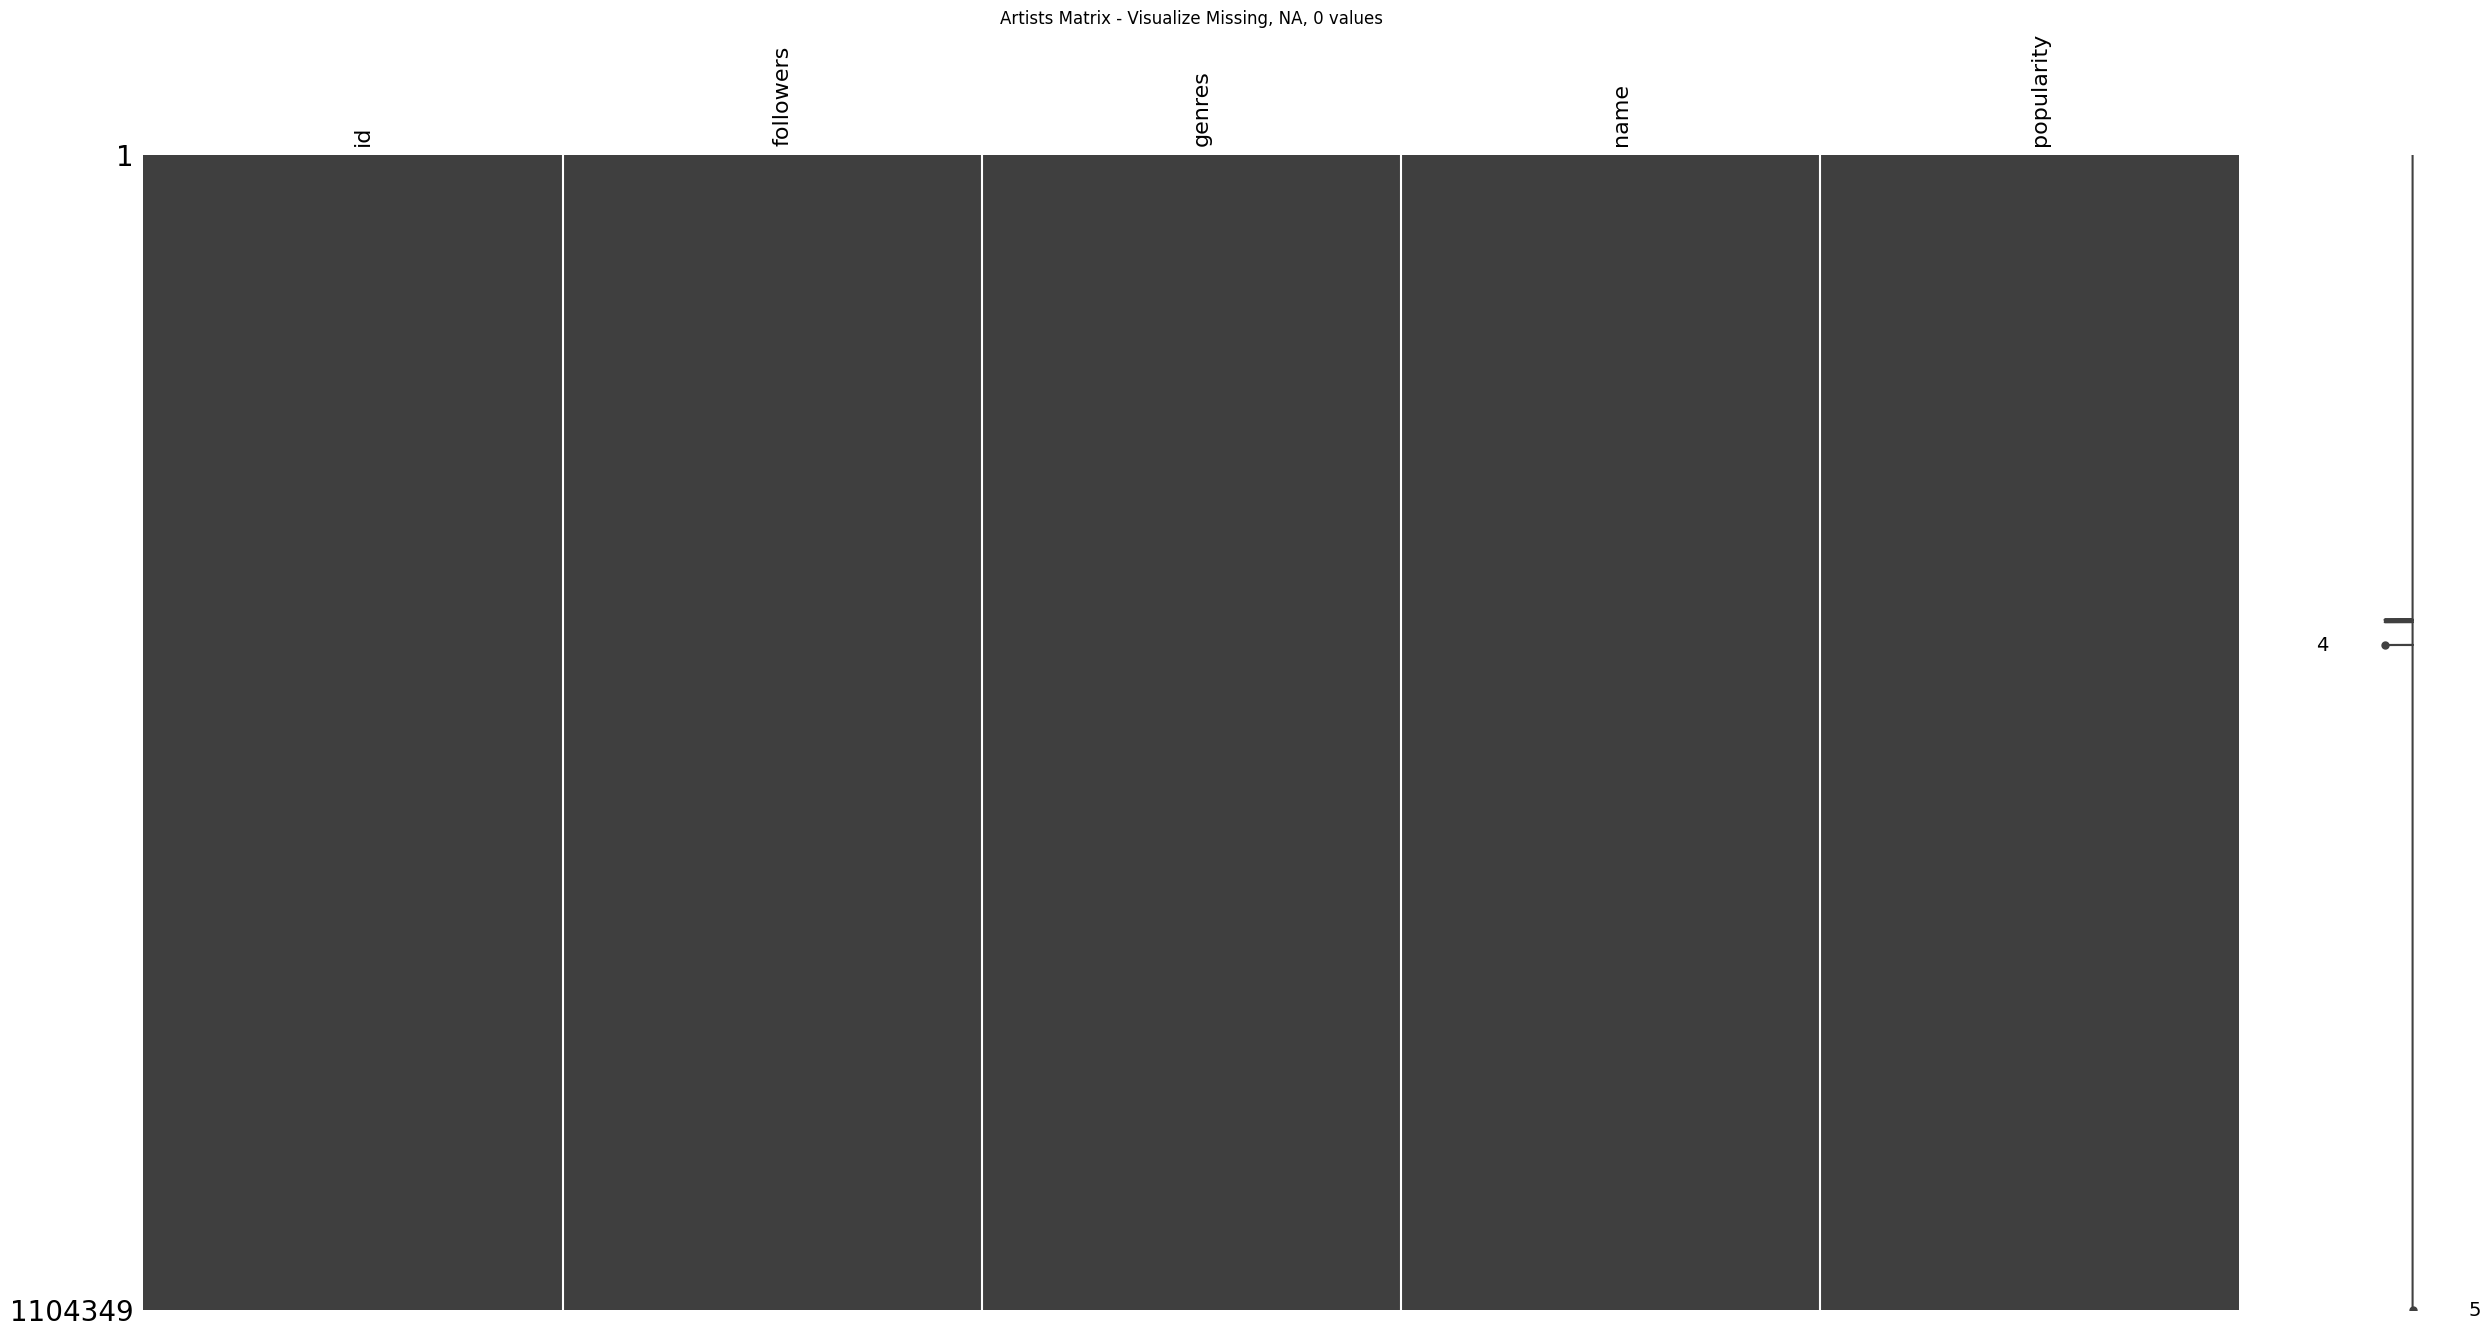

In [149]:
vis_tracks.Matrix()

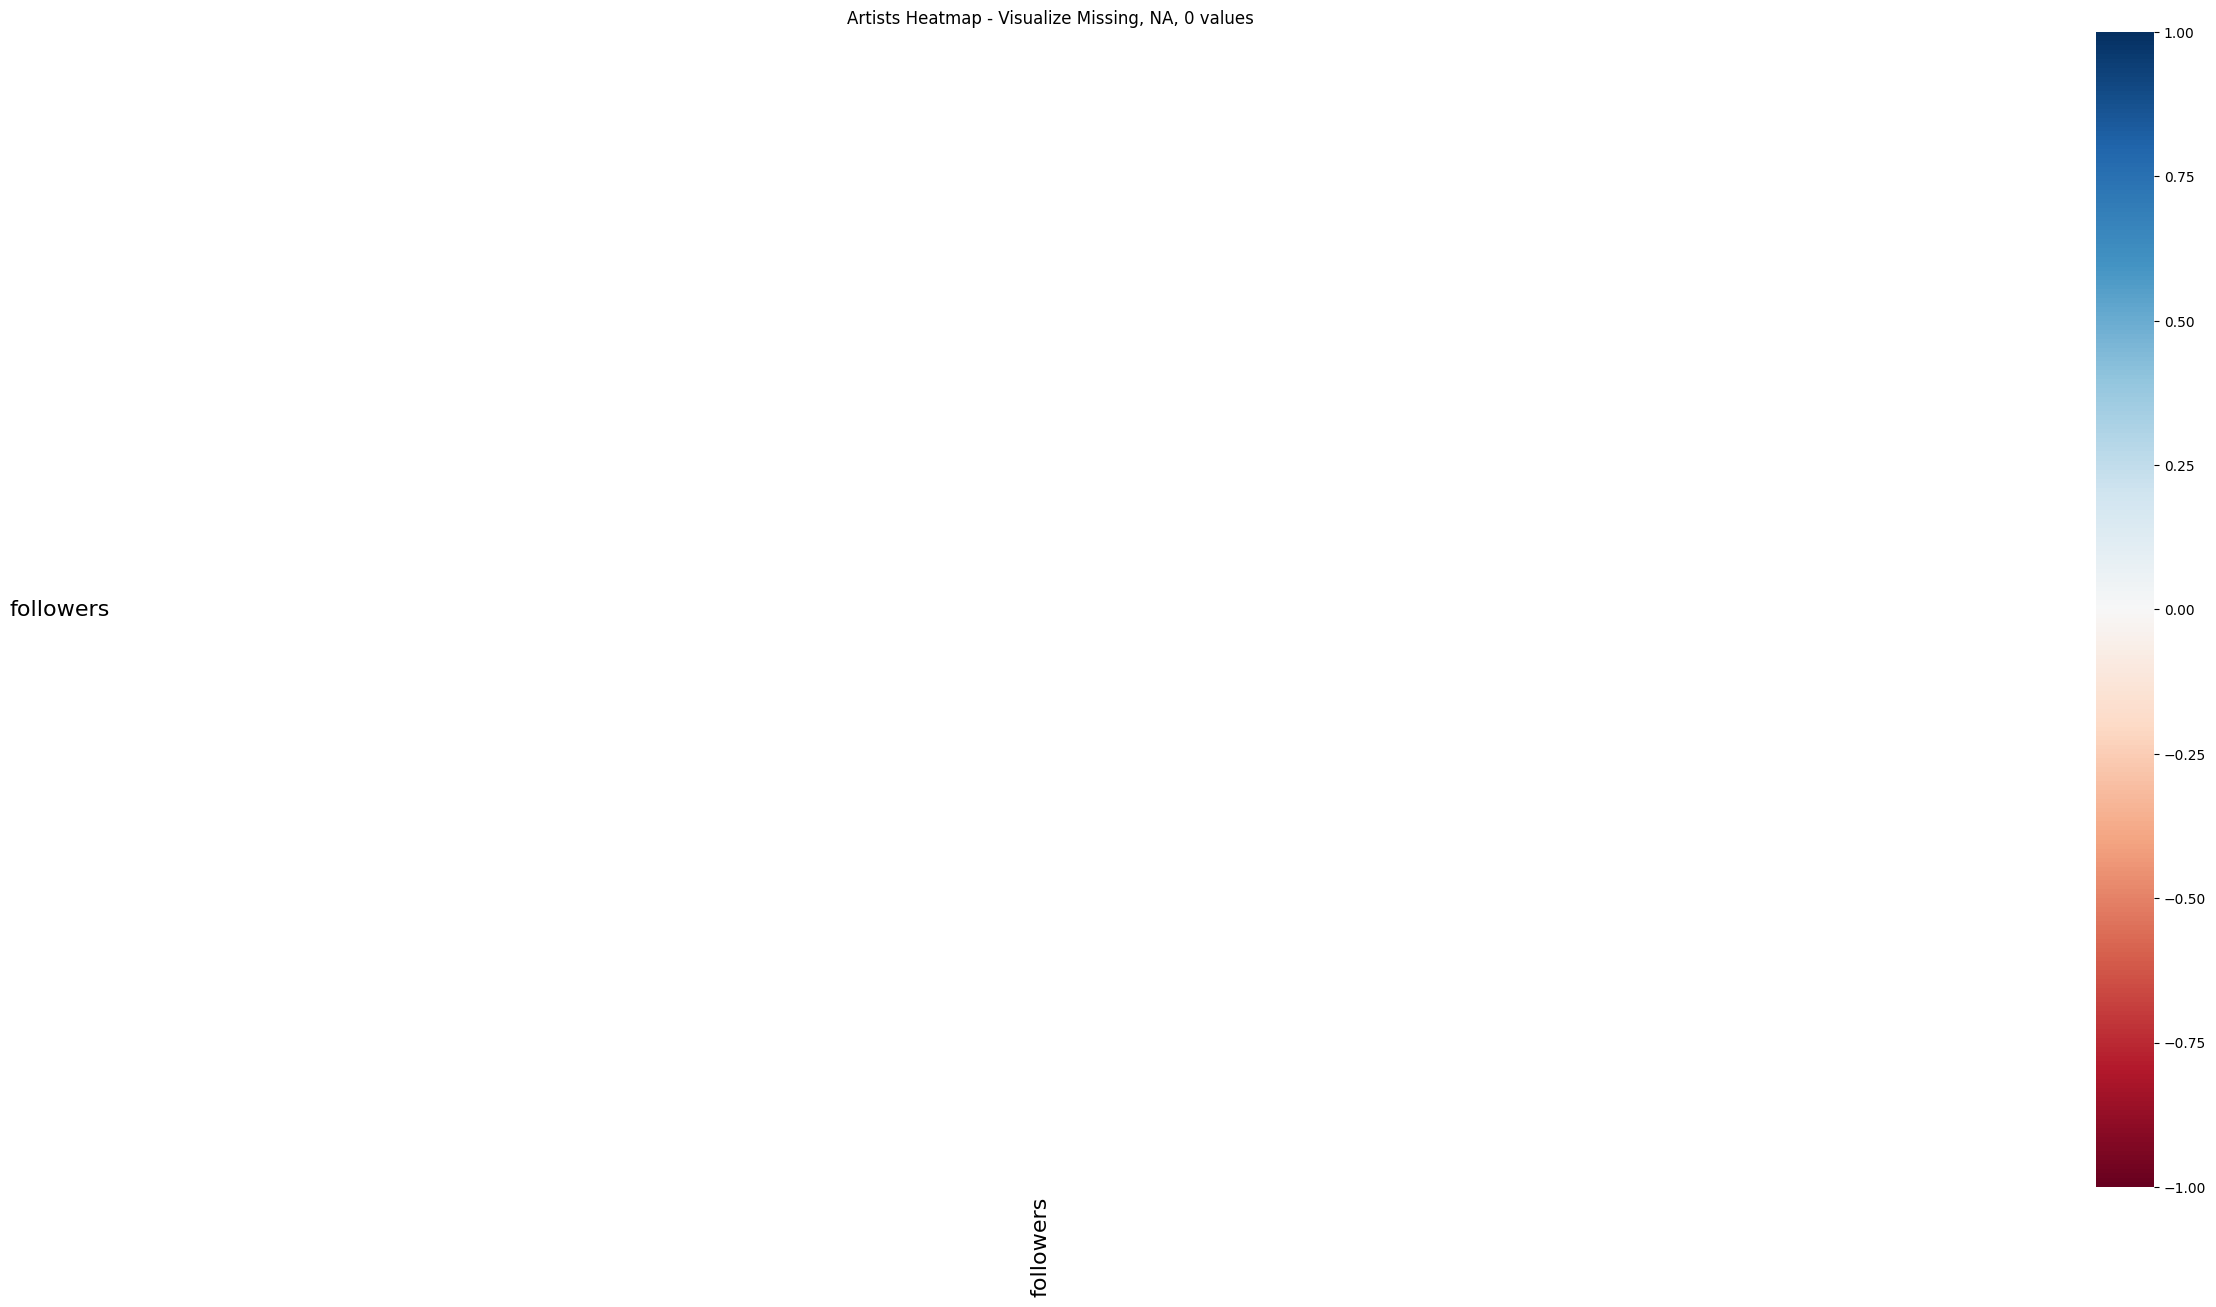

In [150]:
vis_tracks.Heatmap()

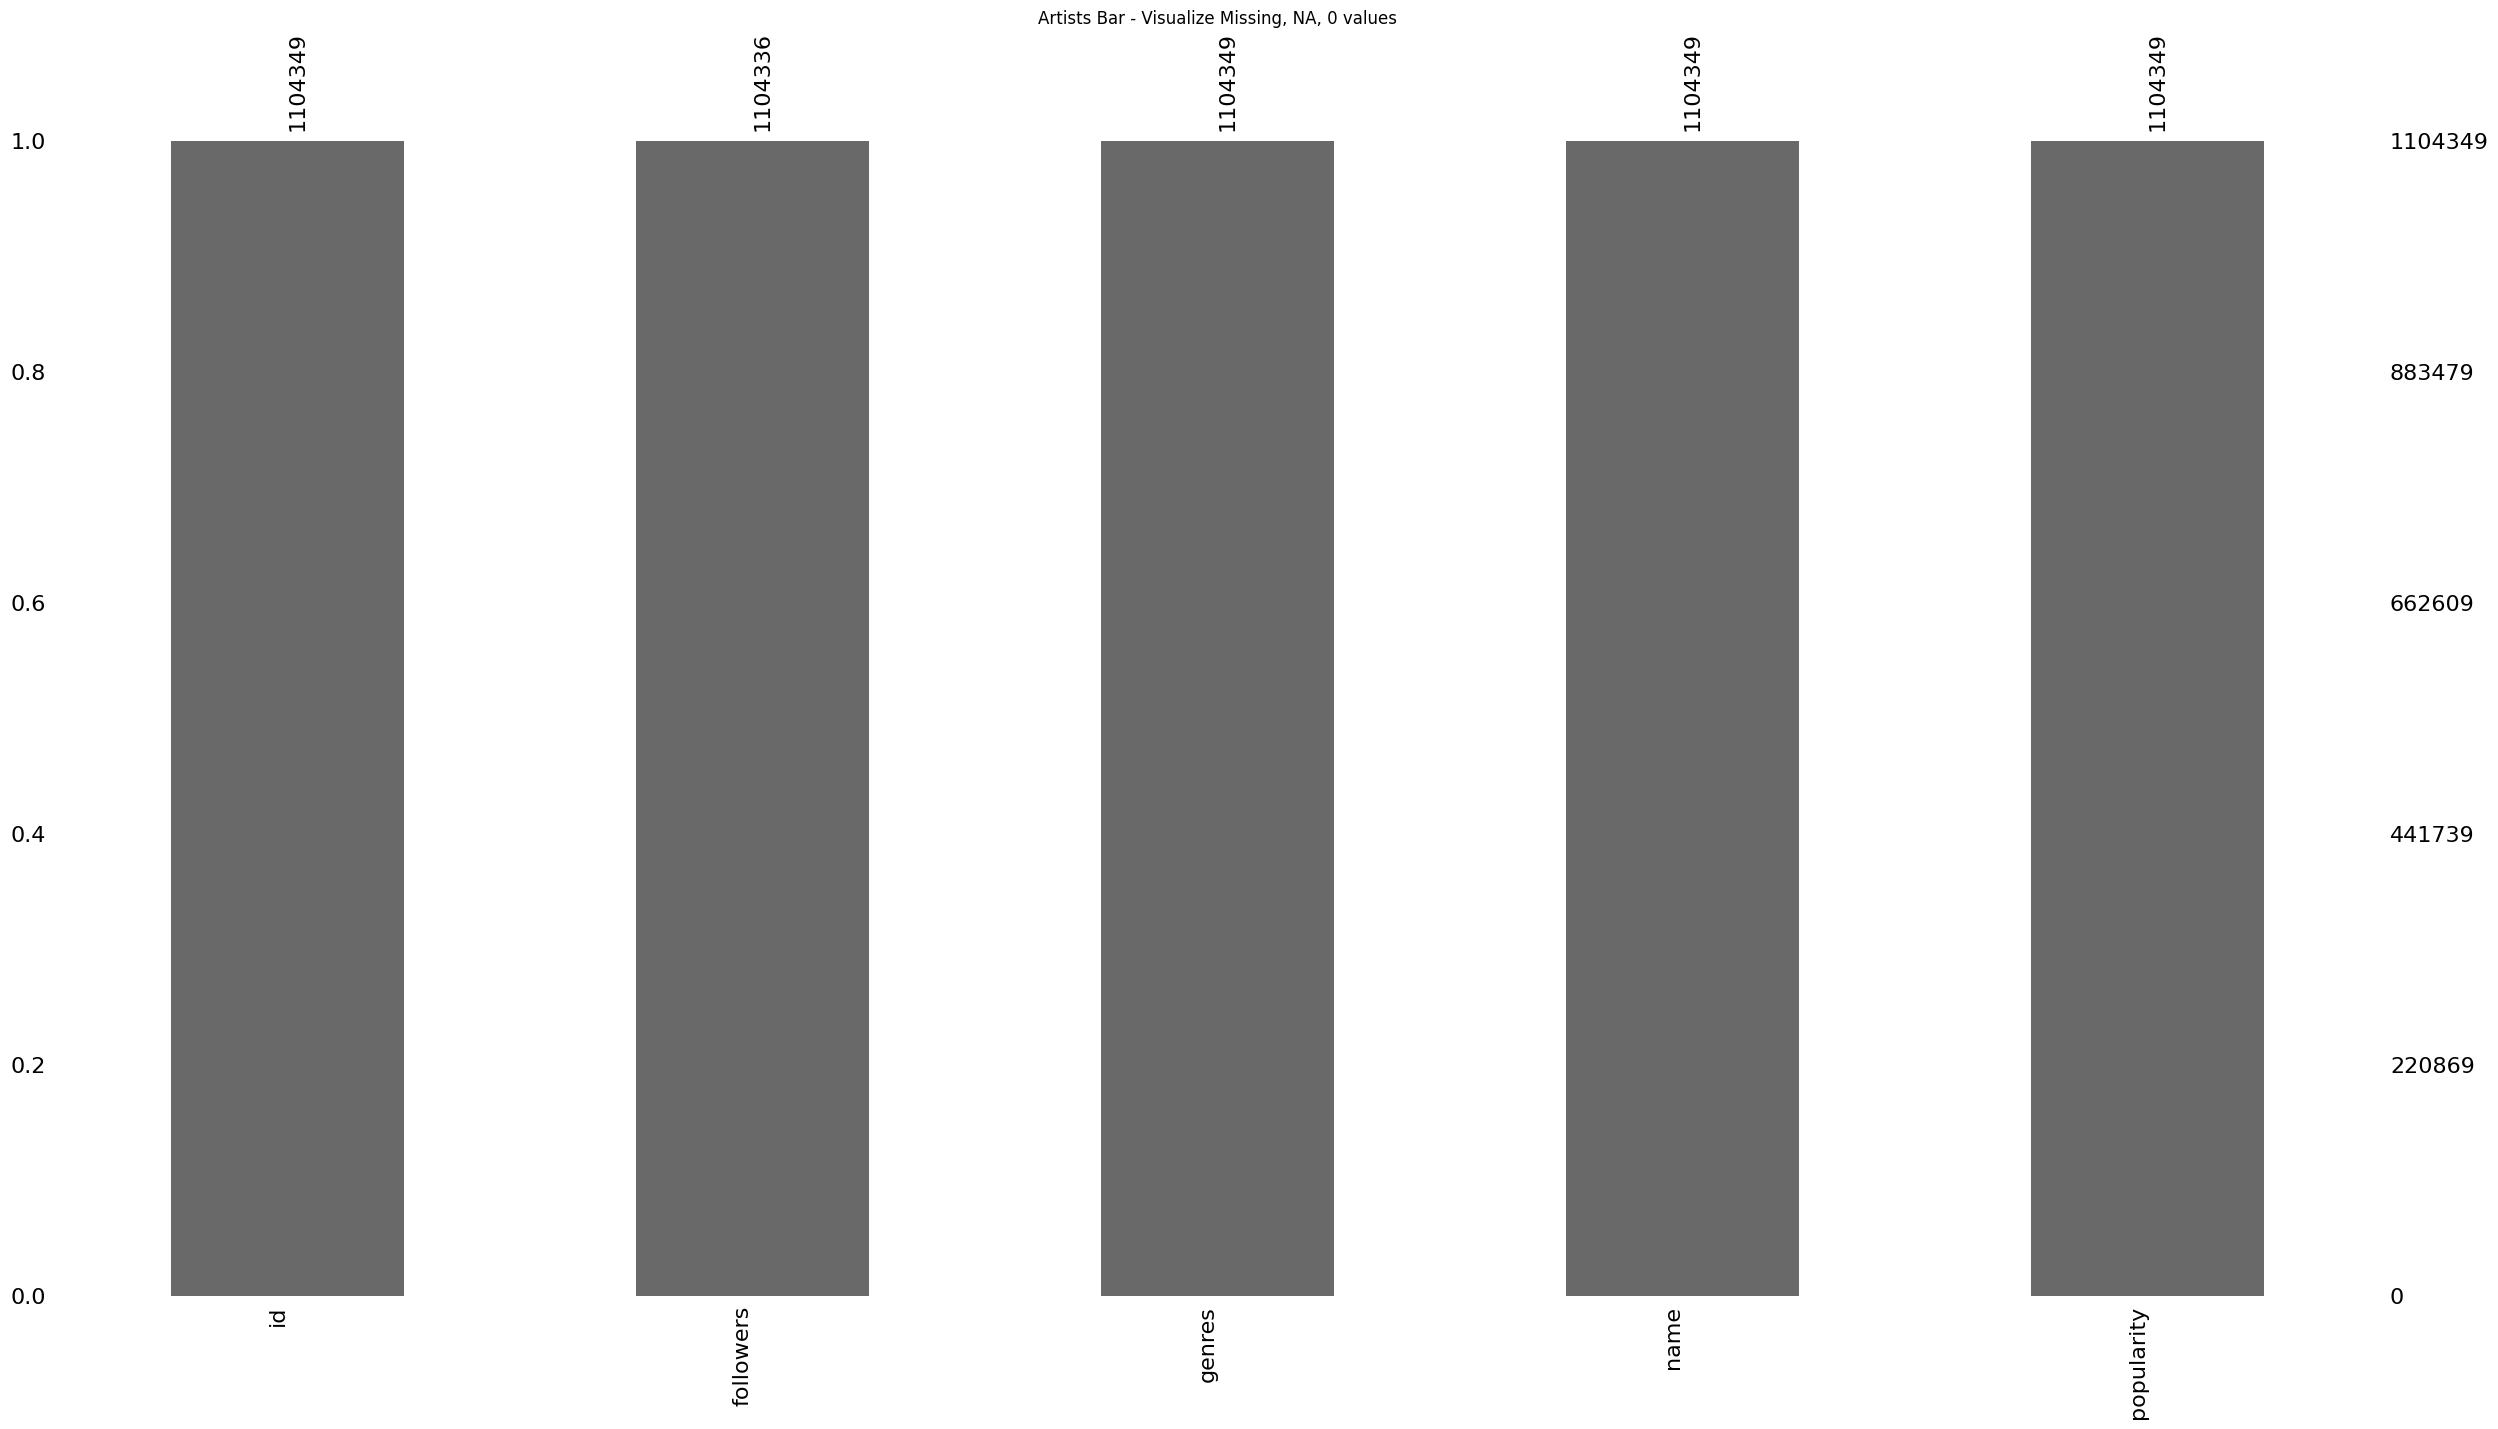

In [151]:
vis_tracks.Bar()